In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from datetime import date
from datetime import datetime
import calendar
import os
import re


from scipy import stats
from sklearn.neighbors import KernelDensity
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation, PillowWriter

import seaborn as sns
from pathlib import Path
from tqdm import tqdm_notebook, trange, tqdm
from PIL import Image, ImageDraw
import io
import random as r

from matplotlib.widgets import Slider, Button, RadioButtons
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
# For downsampling
from sklearn.utils import resample,shuffle

In [90]:
df_companies = pd.read_csv("./data/companies.csv")
df_payments = pd.read_csv("./data/payments.csv")
df_physicians = pd.read_csv("./data/physicians.csv")

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [91]:
df_companies.rename({"State":"State_Comp","Country":"Country_Comp"}, axis='columns', inplace=True)
#df_companies.shape
df_companies

,Company_ID,Name,State_Comp,Country_Comp
0,1,Merck Sharp & Dohme Corporation,NJ,United States
1,2,"COMSORT, Inc",MD,United States
2,3,Daiichi Sankyo Company LTD,NaN,Japan
3,4,"C. R. Bard, Inc. & Subsidiaries",NJ,United States
4,5,Novartis Pharma AG,NaN,Switzerland
...,...,...,...,...
2426,2427,Amryt Pharma Holdings Ltd,NaN,Ireland
2427,2428,"Heraeus Medical Components, LLC",MN,United States
2428,2429,International Life Sciences,GA,United States
2429,2430,"Foundation Consumer Healthcare, LLC",PA,United States


In [92]:
df_physicians.rename({"State":"State_Phys","Country":"Country_Phys"}, axis='columns', inplace=True)
df_physicians

,id,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5
0,1,train,LEIGH,B,HOPPE,NaN,FORT PIERCE,FL,34950,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN
1,2,train,STEVEN,NaN,FRANK,NaN,TOWSON,MD,21204-6808,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN
2,3,train,THOMAS,NaN,COUCH,JR.,TROY,NY,12180-2832,UNITED STATES,nan,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN
3,4,train,CLAUDE,NaN,SU,NaN,SAVANNAH,GA,31419-1753,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN
4,5,train,ROBERT,C,SCHENCK,NaN,ALBUQUERQUE,NM,87131-0001,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,train,MARC,NaN,WEINSTEIN,NaN,TEMPLE TERRACE,FL,33637-0925,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Orthopaedi...,FL,NaN,NaN,NaN,NaN
5996,5997,train,CHARLES,W,YOWELL,NaN,TALLAHASSEE,FL,32308-4620,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Urology,FL,SC,NaN,NaN,NaN
5997,5998,train,MARK,O,GABBIE,NaN,TEXARKANA,AR,71854,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Family Med...,AR,TX,NaN,NaN,NaN
5998,5999,test,KRISHNASWAMY,NaN,GAJARAJ,NaN,RANDOLPH,MA,02368-2100,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,MA,NaN,NaN,NaN,NaN


In [93]:
pd.set_option('display.max_columns', None)
df_payments.head()
#df_payments.shape

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3
0,1,2455,597,48.78,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN
1,2,1534,593,122.43,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN
2,3,2632,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN
3,4,550,760,13.68,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN
4,5,1710,826,17.17,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN


In [94]:
df_payments.describe(include="all")

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3
count,1402250.0,1402250.0,1402250.0,1402250.0,1402250,1402250.0,1402250,1402250,75125,72804,75128,1402250,1402250,767529,19532,156984,1402250,1017616,260063,83564,1316057,299888,102499,1314341,299917,102540,814088,177608,65370
unique,nan,nan,nan,nan,2344,nan,7,14,4557,52,62,2,3,2,2,31927,6,2491,1229,843,6,6,6,8919,3077,2019,1678,594,407
top,nan,nan,nan,nan,11/13/2018,nan,In-kind items and services,Food and Beverage,Chicago,CA,United States,No,No Third Party Payment,No,No,Informational Meal,Yes,50458-580-30,0169-2660-15,0006-0335-30,Drug,Drug,Drug,XARELTO,Repatha,JANUMET XR,Diabetes,Diabetes,Diabetes
freq,nan,nan,nan,nan,1212,nan,1170221,1230887,2328,9651,72804,1399846,1382708,767502,17051,54696,835032,22921,10185,4156,564025,129896,45264,23642,13844,4524,44380,23535,8669
mean,701125.5,3005.275785344981,388.13132465680155,181.19903986450345,NaN,1.0240691745409163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,404794.85182311793,1740.7897991114885,476.04965395393117,10577.141557652785,NaN,0.778075049139652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,1.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,350563.25,1474.0,114.0,11.18,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,701125.5,3037.0,197.0,15.21,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1051687.75,4528.0,473.0,23.34,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#combine into one df
df = pd.merge(df_payments, df_physicians, left_on='Physician_ID', right_on='id', how='left').drop('id', axis=1)
df = pd.merge(df, df_companies, on='Company_ID', how='left')
df.shape


(1402250, 48)

In [100]:

df.rename({"Name":"Company_Name"}, axis='columns', inplace=True)
df.head()

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp
0,1,2455,597,48.78,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN,train,THIPPESWAMY,H,MURTHY,NaN,FAYETTEVILLE,GA,30214-2114,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,"Medtronic Vascular, Inc.",MN,United States
1,2,1534,593,122.43,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN,train,ROMEO,NaN,JONES,NaN,BROOKLYN,NY,11217-1889,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,Amarin Pharma Inc.,NJ,United States
2,3,2632,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,DEEPAK,NaN,RAHEJA,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States
3,4,550,760,13.68,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,train,ROBYN,G,YOUNG,NaN,ALAMEDA,CA,94501-6447,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States
4,5,1710,826,17.17,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN,train,Lanetta,NaN,Anderson,NaN,MEMPHIS,TN,38104-2934,UNITED STATES,nan,NaN,TN,NaN,NaN,NaN,NaN,Actavis Pharma Inc,NJ,United States


In [97]:
df.drop(columns=['Record_ID', 'Physician_ID', 'set', 'First_Name', 'Middle_Name', 'Last_Name', 'Name_Suffix', 'Company_Name'],inplace=True)
df.head()

,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,State_Comp,Country_Comp
0,597,48.78,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN,FAYETTEVILLE,GA,30214-2114,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,MN,United States
1,593,122.43,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN,BROOKLYN,NY,11217-1889,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,NJ,United States
2,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,CA,United States
3,760,13.68,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,ALAMEDA,CA,94501-6447,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,CA,United States
4,826,17.17,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN,MEMPHIS,TN,38104-2934,UNITED STATES,nan,NaN,TN,NaN,NaN,NaN,NaN,NJ,United States


In [113]:
# def string_date(date):
#     return datetime.strptime(str(date),"%m/%d/%Y")

# df['Date'].apply(string_date)
# df['Date']=pd.to_datetime(df['Date'])
# df.head()
# df.sort_values(by='Date')
# df.dtypes
# pd.set_option('display.float_format', str)
# fig = plt.figure(figsize = (10,5))
# ax = fig.gca()
# attribute='Date'
# df[attribute].value_counts().plot()
df['Ownership_Indicator']=np.where((df.Ownership_Indicator == "Yes"),1,df.Ownership_Indicator)
df['Ownership_Indicator']=np.where((df.Ownership_Indicator == "No"),0,df.Ownership_Indicator)
# df.Ownership_Indicator.value_counts(dropna=False)
    

In [158]:

print(df.columns)
#df[df.Ownership_Indicator==1].Contextual_Information.value_counts(dropna=False)
# print(pd.unique(df[['Product_Code_1', 'Product_Code_2', 'Product_Code_3']].values.ravel('K')))

#CONCLUSION:
#iterate through and drop all record with no name but code, since these are all for
#0 Ownership_Indicator, can lead to balanced data
#ultimatey drop Product Code Type and category Columns
# df_scrap=df.query('Product_Code_1.notna() and Product_Name_1.isnull()', engine='python')
df_scrap = df.query('Countre_Phys')
df_scrap['Ownership_Indicator'].value_counts()

Index(['Record_ID', 'Physician_ID', 'Company_ID',
       'Total_Amount_of_Payment_USDollars', 'Date', 'Number_of_Payments',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value', 'City_of_Travel',
       'State_of_Travel', 'Country_of_Travel', 'Ownership_Indicator',
       'Third_Party_Recipient', 'Charity', 'Third_Party_Covered',
       'Contextual_Information', 'Related_Product_Indicator', 'Product_Code_1',
       'Product_Code_2', 'Product_Code_3', 'Product_Type_1', 'Product_Type_2',
       'Product_Type_3', 'Product_Name_1', 'Product_Name_2', 'Product_Name_3',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'set',
       'First_Name', 'Middle_Name', 'Last_Name', 'Name_Suffix', 'City',
       'State_Phys', 'Zipcode', 'Country_Phys', 'Province',
       'Primary_Specialty', 'License_State_1', 'License_State_2',
       'License_State_3', 'License_State_4', 'License_State_5', 'Company_Name',
       'State_Comp', 'Country_

0    3
Name: Ownership_Indicator, dtype: int64

## Cell for encoding starts here

In [137]:

name_list = pd.unique(df[['Product_Name_1', 'Product_Name_2', 'Product_Name_3']].values.ravel('K'))
name_list_dict = {}
int_code=1
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1
print(name_list_dict)

{'Pacemakers': 1, 'Vascepa': 2, 'ACTHAR': 3, 'GENERESS': 4, 'Rituxan': 5, 'Benicar': 6, 'ABILIFY TABLET': 7, 'NovoLog': 8, 'TRADJENTA': 9, nan: 10, 'ACZONE': 11, 'Welchol': 12, 'STRATTERA': 13, 'Levemir': 14, 'BENLYSTA': 15, 'PROVENGE': 16, 'Brovana': 17, 'Amitiza': 18, 'ARTHREX PRODUCT LINE DISTAL EXTREMITY ARTHROSCOPY': 19, 'TECFIDERA': 20, 'Gralise': 21, 'Tribenzor': 22, 'TYSABRI': 23, 'Nesina': 24, 'Philips Oral Healthcare': 25, 'BRILINTA': 26, 'SYMBICORT': 27, 'PriMatrix': 28, 'Endoscopy# Endocutters': 29, 'TORIC': 30, 'SABRIL': 31, 'PRADAXA': 32, 'INTERVENTIONAL PRODUCT': 33, 'Rhinology': 34, 'NEUROLOGICAL PRODUCT': 35, 'CORDRAN LOTION': 36, 'Osphena': 37, 'Dymista': 38, 'JANUVIA': 39, 'Latuda': 40, 'CRESTOR': 41, 'EFFIENT': 42, 'SEROQUEL XR': 43, 'LYRICA': 44, 'Stivarga': 45, 'ABILIFY MAINTENA': 46, 'SEAMGUARD  Bioabsorbable Staple': 47, 'FORTEO': 48, 'Herceptin': 49, 'AMITIZA': 50, 'Vascular': 51, 'DERMAGRAFT': 52, 'CRYSTALENS': 53, 'AMRIX': 54, 'SPIRIVA': 55, 'LO LOESTRIN': 56

In [138]:
df.head()

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp,Nature_of_Payment_or_Transfer_of_Value_code,Date_year,Date_month,Date_day
0,1,2455,597,48.78,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN,train,THIPPESWAMY,H,MURTHY,NaN,FAYETTEVILLE,GA,30214-2114,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,"Medtronic Vascular, Inc.",MN,United States,8,2013,8,1
1,2,1534,593,122.43,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,0,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN,train,ROMEO,NaN,JONES,NaN,BROOKLYN,NY,11217-1889,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,Amarin Pharma Inc.,NJ,United States,8,2013,8,1
2,3,2632,760,10.26,2013-08-01,1,In-kind items and services,Education,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,DEEPAK,NaN,RAHEJA,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States,6,2013,8,1
3,4,550,760,13.68,2013-08-01,1,In-kind items and services,Education,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,train,ROBYN,G,YOUNG,NaN,ALAMEDA,CA,94501-6447,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States,6,2013,8,1
4,5,1710,826,17.17,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN,train,Lanetta,NaN,Anderson,NaN,MEMPHIS,TN,38104-2934,UNITED STATES,nan,NaN,TN,NaN,NaN,NaN,NaN,Actavis Pharma Inc,NJ,United States,8,2013,8,1


In [160]:
def product_encode(product_name):
    return name_list_dict.get(product_name)

df['Product_Name_1'] = df['Product_Name_1'].apply(product_encode)
df['Product_Name_2'] = df['Product_Name_2'].apply(product_encode)
df['Product_Name_3'] = df['Product_Name_3'].apply(product_encode)

df.head()

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp,Nature_of_Payment_or_Transfer_of_Value_code,Date_year,Date_month,Date_day
0,1,2455,597,48.78,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,1,10,10,NaN,NaN,NaN,train,THIPPESWAMY,H,MURTHY,NaN,FAYETTEVILLE,GA,30214-2114,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,"Medtronic Vascular, Inc.",MN,United States,8,2013,8,1
1,2,1534,593,122.43,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,0,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,2,10,10,NaN,NaN,NaN,train,ROMEO,NaN,JONES,NaN,BROOKLYN,NY,11217-1889,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,Amarin Pharma Inc.,NJ,United States,8,2013,8,1
2,3,2632,760,10.26,2013-08-01,1,In-kind items and services,Education,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,3,10,10,NaN,NaN,NaN,test,DEEPAK,NaN,RAHEJA,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States,6,2013,8,1
3,4,550,760,13.68,2013-08-01,1,In-kind items and services,Education,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,3,10,10,NaN,NaN,NaN,train,ROBYN,G,YOUNG,NaN,ALAMEDA,CA,94501-6447,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States,6,2013,8,1
4,5,1710,826,17.17,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,0,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,4,10,10,NaN,NaN,NaN,train,Lanetta,NaN,Anderson,NaN,MEMPHIS,TN,38104-2934,UNITED STATES,nan,NaN,TN,NaN,NaN,NaN,NaN,Actavis Pharma Inc,NJ,United States,8,2013,8,1


In [162]:
print(df.dtypes)

Record_ID                                               int64
Physician_ID                                            int64
Company_ID                                              int64
Total_Amount_of_Payment_USDollars                     float64
Date                                           datetime64[ns]
Number_of_Payments                                      int64
Form_of_Payment_or_Transfer_of_Value                   object
Nature_of_Payment_or_Transfer_of_Value               category
City_of_Travel                                         object
State_of_Travel                                        object
Country_of_Travel                                      object
Ownership_Indicator                                    object
Third_Party_Recipient                                  object
Charity                                                object
Third_Party_Covered                                    object
Contextual_Information                                 object
Related_

In [107]:


df['Nature_of_Payment_or_Transfer_of_Value']=df['Nature_of_Payment_or_Transfer_of_Value'].astype('category')
df['Nature_of_Payment_or_Transfer_of_Value_code']=df['Nature_of_Payment_or_Transfer_of_Value'].cat.codes

df['Date_year']=df['Date'].dt.year
df['Date_month']=df['Date'].dt.month
df['Date_day']=df['Date'].dt.day



df['Form_of_Payment_or_Transfer_of_Value']=df['Form_of_Payment_or_Transfer_of_Value'].astype('category')
df['Form_of_Payment_or_Transfer_of_Value_code']=df['Form_of_Payment_or_Transfer_of_Value'].cat.codes

columns_encode=['Nature_of_Payment_or_Transfer_of_Value','Form_of_Payment_or_Transfer_of_Value','City_of_Travel','State_of_Travel', 'Country_of_Travel','Zipcode']
print(df.Form_of_Payment_or_Transfer_of_Value.value_counts())

df.head()

In-kind items and services                              1170221
Cash or cash equivalent                                  231967
Dividend, profit or other return on investment               38
Stock                                                        13
Stock, stock option, or any other ownership interest          4
Any other ownership interest                                  4
Stock option                                                  3
Name: Form_of_Payment_or_Transfer_of_Value, dtype: int64


,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp,Nature_of_Payment_or_Transfer_of_Value_code,Date_year,Date_month,Date_day
0,1,2455,597,48.78,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN,train,THIPPESWAMY,H,MURTHY,NaN,FAYETTEVILLE,GA,30214-2114,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,"Medtronic Vascular, Inc.",MN,United States,8,2013,8,1
1,2,1534,593,122.43,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN,train,ROMEO,NaN,JONES,NaN,BROOKLYN,NY,11217-1889,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,Amarin Pharma Inc.,NJ,United States,8,2013,8,1
2,3,2632,760,10.26,2013-08-01,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,DEEPAK,NaN,RAHEJA,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States,6,2013,8,1
3,4,550,760,13.68,2013-08-01,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,train,ROBYN,G,YOUNG,NaN,ALAMEDA,CA,94501-6447,UNITED STATES,nan,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States,6,2013,8,1
4,5,1710,826,17.17,2013-08-01,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN,train,Lanetta,NaN,Anderson,NaN,MEMPHIS,TN,38104-2934,UNITED STATES,nan,NaN,TN,NaN,NaN,NaN,NaN,Actavis Pharma Inc,NJ,United States,8,2013,8,1


In [36]:

df_scrap=df[df.Related_Product_Indicator=="Combination"]
df_scrap.head()
df_scrap['Nature_of_Payment_or_Transfer_of_Value'].unique()

array(['Food and Beverage', 'Travel and Lodging', 'Gift',
       'Consulting Fee', 'Royalty or License',
       'Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program',
       'Education', 'Honoraria',
       'Compensation for serving as faculty or as a speaker for an accredited or certified continuing education program',
       'Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program',
       'Charitable Contribution'], dtype=object)

In [50]:
df.columns
print(df.shape)
first_col = df.pop("Ownership_Indicator")
print(df.shape)
df.insert(47,"Ownership_Indicator",first_col)
print(df.shape)
print(df.columns)

(1402250, 48)
(1402250, 47)
(1402250, 48)
Index(['Record_ID', 'Physician_ID', 'Company_ID',
       'Total_Amount_of_Payment_USDollars', 'Date', 'Number_of_Payments',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value', 'City_of_Travel',
       'State_of_Travel', 'Country_of_Travel', 'Third_Party_Recipient',
       'Charity', 'Third_Party_Covered', 'Contextual_Information',
       'Related_Product_Indicator', 'Product_Code_1', 'Product_Code_2',
       'Product_Code_3', 'Product_Type_1', 'Product_Type_2', 'Product_Type_3',
       'Product_Name_1', 'Product_Name_2', 'Product_Name_3',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'set',
       'First_Name', 'Middle_Name', 'Last_Name', 'Name_Suffix', 'City',
       'State_Phys', 'Zipcode', 'Country_Phys', 'Province',
       'Primary_Specialty', 'License_State_1', 'License_State_2',
       'License_State_3', 'License_State_4', 'License_State_5', 'Company_Name',
       'Sta

In [51]:
df_test=df[df.set=="test"]
df_train=df[df.set=="train"]

In [52]:
df_train['Ownership_Indicator']=np.where((df_train.Ownership_Indicator == "Yes"),1,df_train.Ownership_Indicator)
df_train['Ownership_Indicator']=np.where((df_train.Ownership_Indicator == "No"),0,df_train.Ownership_Indicator)

<ipython-input-52-5ef3ec0b706a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ownership_Indicator']=np.where((df_train.Ownership_Indicator == "Yes"),1,df_train.Ownership_Indicator)
<ipython-input-52-5ef3ec0b706a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Ownership_Indicator']=np.where((df_train.Ownership_Indicator == "No"),0,df_train.Ownership_Indicator)


In [69]:
print(df_train[df_train['Company_Name']=="Biogen Idec Inc."]['Ownership_Indicator'].value_counts())
print(df_train['Ownership_Indicator'].value_counts())

0    7152
1    1237
Name: Ownership_Indicator, dtype: int64
0    1167626
1       2404
Name: Ownership_Indicator, dtype: int64


In [66]:
df_scrap=df_train_final[df_train_final['Company_Name']=="Biogen Idec Inc."]
df_scrap.Ownership_Indicator.value_counts()

1    1237
0      16
Name: Ownership_Indicator, dtype: int64

Index(['Record_ID', 'Physician_ID', 'Company_ID',
       'Total_Amount_of_Payment_USDollars', 'Date', 'Number_of_Payments',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value', 'City_of_Travel',
       'State_of_Travel', 'Country_of_Travel', 'Third_Party_Recipient',
       'Charity', 'Third_Party_Covered', 'Contextual_Information',
       'Related_Product_Indicator', 'Product_Code_1', 'Product_Code_2',
       'Product_Code_3', 'Product_Type_1', 'Product_Type_2', 'Product_Type_3',
       'Product_Name_1', 'Product_Name_2', 'Product_Name_3',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'set',
       'First_Name', 'Middle_Name', 'Last_Name', 'Name_Suffix', 'City',
       'State_Phys', 'Zipcode', 'Country_Phys', 'Province',
       'Primary_Specialty', 'License_State_1', 'License_State_2',
       'License_State_3', 'License_State_4', 'License_State_5', 'Company_Name',
       'State_Comp', 'Country_Comp', 'Ownership_Indic

<AxesSubplot:xlabel='Ownership_Indicator', ylabel='count'>

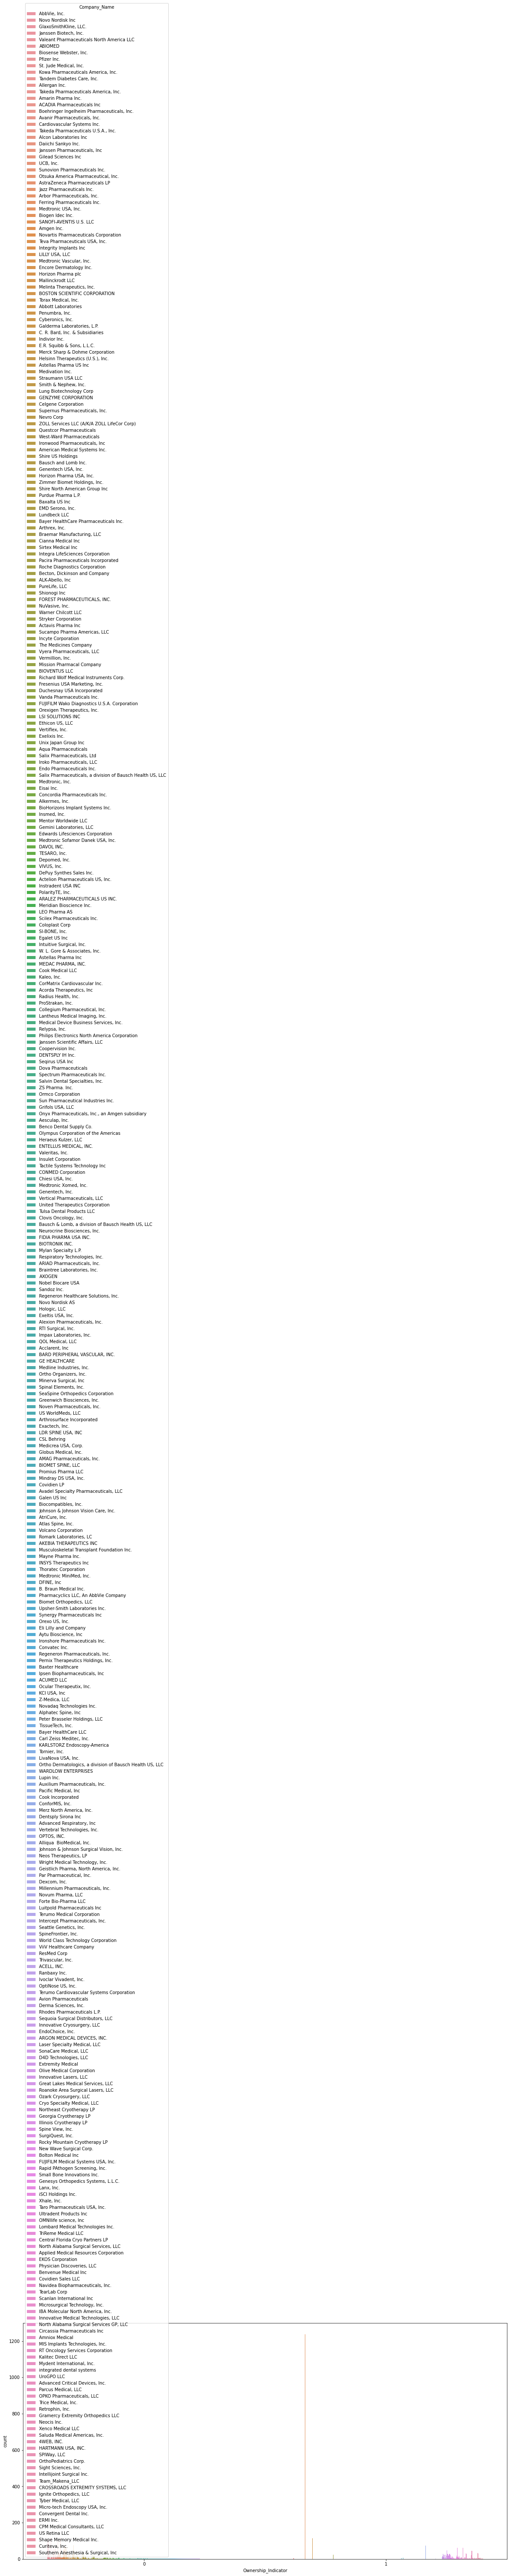

In [63]:
print(df_train_final.columns)
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
sns.countplot(x='Ownership_Indicator',hue='Company_Name', data=df_train_final)

In [27]:
df_train.Ownership_Indicator.value_counts()


0    1167626
1       2404
Name: Ownership_Indicator, dtype: int64

In [58]:
df_train_maj=df_train[df_train.Ownership_Indicator==0]
df_train_min=df_train[df_train.Ownership_Indicator==1]
df_train_maj_down=resample(df_train_maj, replace=False, n_samples=2404, random_state=2021)
df_train_final = pd.concat([df_train_maj_down, df_train_min])
df_train_final.shape

(4808, 48)

In [35]:
df_train_final['is_train']=np.random.uniform(0,1,len(df_train_final)) <=.80
print(df_train_final.columns)
df_train_final


Index(['Record_ID', 'Physician_ID', 'Company_ID',
       'Total_Amount_of_Payment_USDollars', 'Date', 'Number_of_Payments',
       'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value', 'City_of_Travel',
       'State_of_Travel', 'Country_of_Travel', 'Third_Party_Recipient',
       'Charity', 'Third_Party_Covered', 'Contextual_Information',
       'Related_Product_Indicator', 'Product_Code_1', 'Product_Code_2',
       'Product_Code_3', 'Product_Type_1', 'Product_Type_2', 'Product_Type_3',
       'Product_Name_1', 'Product_Name_2', 'Product_Name_3',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'set',
       'First_Name', 'Middle_Name', 'Last_Name', 'Name_Suffix', 'City',
       'State_Phys', 'Zipcode', 'Country_Phys', 'Province',
       'Primary_Specialty', 'License_State_1', 'License_State_2',
       'License_State_3', 'License_State_4', 'License_State_5', 'Company_Name',
       'State_Comp', 'Country_Comp', 'Ownership_Indic

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp,Ownership_Indicator,is_train
617949,617950,2223,123,193.53,05/10/2016,1,In-kind items and services,Travel and Lodging,Missoula,MT,United States,No Third Party Payment,No,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,ROSHAN,NaN,KOTHA,NaN,LA MESA,CA,91942-7003,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,CA,WI,NaN,NaN,NaN,"AbbVie, Inc.",IL,United States,0,True
138200,138201,3246,74,2.83,04/07/2014,1,In-kind items and services,Education,NaN,NaN,NaN,No Third Party Payment,No,NaN,NaN,Covered,0169-4060-90,NaN,NaN,Drug or Biological,NaN,NaN,Victoza,NaN,NaN,NaN,NaN,NaN,train,BRANDON,PATRICK,BYRON,NaN,MORGANTOWN,WV,26501,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Family Med...,WV,NaN,NaN,NaN,NaN,Novo Nordisk Inc,NJ,United States,0,True
1230894,1230895,1627,123,15.48,02/21/2019,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No Third Party Payment,No,NaN,NaN,Yes,0074-0554-02,NaN,NaN,Biological,NaN,NaN,Humira,NaN,NaN,Immunology,NaN,NaN,train,STEPHEN,E,KUEHN,NaN,JACKSONVILLE,FL,32204-4757,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,MI,FL,NaN,NaN,NaN,"AbbVie, Inc.",IL,United States,0,True
1214230,1214231,1220,334,2.97,01/24/2019,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No Third Party Payment,No,NaN,NaN,Yes,0173-0881-01,NaN,NaN,Biological,NaN,NaN,NUCALA,NaN,NaN,RESPIRATORY,NaN,NaN,train,RICHARD,T,MAHON,NaN,ROCKVILLE,MD,20853-1334,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,MD,VA,NaN,NaN,NaN,"GlaxoSmithKline, LLC.",NC,United States,0,True
1284285,1284286,196,334,23.07,05/21/2019,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No Third Party Payment,No,NaN,NaN,Yes,0173-0881-01,NaN,NaN,Biological,NaN,NaN,NUCALA,NaN,NaN,RESPIRATORY,NaN,NaN,train,RALPH,V,TREMAGLIO,NaN,NAUGATUCK,CT,06770-2836,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,CT,NaN,NaN,NaN,NaN,"GlaxoSmithKline, LLC.",NC,United States,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389314,1389315,3051,1760,5278.57,11/25/2019,1,Cash or cash equivalent,Royalty or License,NaN,NaN,NaN,No Third Party Payment,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Device,NaN,NaN,NaN,NaN,NaN,Medical Implant,NaN,NaN,train,TERRENCE,M,PHILBIN,NaN,WORTHINGTON,OH,43085-2217,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Orthopaedi...,ME,OH,NaN,NaN,NaN,"CROSSROADS EXTREMITY SYSTEMS, LLC",TN,United States,1,True
1390881,1390882,3969,2310,1797.00,12/02/2019,3,Cash or cash equivalent,Consulting Fee,NaN,NaN,NaN,No Third Party Payment,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Device,NaN,NaN,Intellijoint HIP,NaN,NaN,Orthopedics,NaN,NaN,train,RAN,NaN,SCHWARZKOPF,NaN,ORANGE,CA,92868-3201,UNITED STATES,NaN,NaN,CA,NY,MA,FL,NaN,Intellijoint Surgical Inc.,NaN,Canada,1,True
1399823,1399824,576,2087,169.50,12/18/2019,1,Cash or cash equivalent,Food and Beverage,NaN,NaN,NaN,No Third Party Payment,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Device,NaN,NaN,SureClip and Traction Device,NaN,NaN,GI Disposables,NaN,NaN,train,SAMMY,NaN,HO,NaN,BRONX,NY,10467,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,NC,N

In [ ]:

train, test = df_train_final[df_train_final['is_train']==True], df_train_final[df_train_final['is_train']==False]
train = shuffle(train)
test = shuffle(test)
features=train[train.columns[0:48]]
y=train['Ownership_Indicator']
x_test = test[test.columns[0:48]]
y_test = test['Ownership_Indicator']